In [1]:
import sys
sys.path.append("../../RL-book")
from dataclasses import dataclass
from typing import Tuple, Dict
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.markov_decision_process import FinitePolicy, StateActionMapping
from rl.markov_process import FiniteMarkovProcess, FiniteMarkovRewardProcess
from rl.distribution import Categorical, Constant
from scipy.stats import poisson
import numpy as np
from more_itertools import distinct_permutations
import matplotlib.pyplot as plt

# Problem 1:

For a Deterministic Policy $\pi_D$ ∶ $\mathcal{S} \to \mathcal{A}$, write with precise mathematical notation the 4 MDP
Bellman Policy Equations, i.e., $V^{\pi_D}$ in terms of $Q^{\pi_D}$, $Q^{\pi_D}$ in terms of $V^{\pi_D}$ , $V^{\pi_D}$ in terms of $V^{\pi_D}$, $Q^{\pi_D}$ in terms of $Q^{\pi_D}$. Note that in the book, we have written the 4 MDP Policy Equations in
terms of the notation for a stochastic policy π ∶ $\mathcal{S}$ × $\mathcal{A}$ → [0, 1].

**Answer:** Okay, so first off we have a deterministic policy. This means that for every state there is only one action and thus only one reward. Now we can modify the equations in the book by summing over the policies (they are all 1) and the actions (also 1). What is kinda weird about this question is that once you have a determanistic policy, there really is not need for an action value function since you can only take one action and that action leads to the next state. What I don't get is that the action value function tells you the benifit of taking a specific action while in a specific state and the state value function tells you the benifit of being in that state. SO does that mean that the action value function is the benifit of going to a new state?

We know in a stocastic policy we have:

\begin{equation}
V^{\pi}(s) = \sum_{a \in \mathcal{A}} \pi(s,a) \cdot Q^{\pi}(s,a)
\end{equation}

However in a determanistic policy we know there is one action per state so this just becomes:

\begin{equation}
V^{\pi}(s) =  Q^{\pi}(s,a)
\end{equation}

Additionally we also know:

\begin{equation}
\mathcal{P}^{\pi}(s,s') = \mathcal{P}^{\pi}(s,a,s')
\end{equation}

So I guess they are just interchangable now so that's the answer...

**State-Value Function:**

\begin{equation}
V^{\pi}(s) = \mathcal{R}^{\pi}(s) + \gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}^{\pi}(s,s') \cdot V^{\pi}(s')
\end{equation}

\begin{equation}
V^{\pi}(s) = \mathcal{R}^{\pi}(s) + \gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}^{\pi}(s,s') \cdot Q^{\pi}(s',a')
\end{equation}

**Action-Value Function:**

\begin{equation}
Q^{\pi}(s,a) = \mathcal{R}^{\pi}(s) + \gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}^{\pi}(s,s') \cdot Q^{\pi}(s',a')
\end{equation}

\begin{equation}
Q^{\pi}(s,a) = \mathcal{R}^{\pi}(s) + \gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}^{\pi}(s,s') \cdot V^{\pi}(s')
\end{equation}


# Problem 2:

For this problem we are going to be looking at a MPD with infinite states. We always start in state s=1 and each state has a continuous set of actions a $\in$ [0,1]. The probability of taking an action and moving to the next state is equal to the action value and the probability of taking an action and staying in the same state is 1 - the action value. The reward for transitioning to the next state is 1-a and the reward for staying in the same state is 1 + a.

Alright so breaking this down if you have a low "a" you are not likely to move states, but your reward is 1 + a so you only really get a reward of 1.

If you have a large "a" then you are very likely to transition to a new state, but you reward is now pretty small. 

Based on this information I would guess that the optimal action would be an a of 0 as you are guarenteed a reward of 1 each time, however if the probability is .1 then 90% of the time you get a reward of 1.1 and 10% of the time you get a reward of .9. thus if we summed this over 10 with perfect probabilities we would get a total of 1.1*9 + .9 = 10.8 which is larger than 10. Thus the answer is somewhere in the lower a's. Now let's find it:

Let's start with the **Bellman Optimality Equation:**

\begin{equation}
v_*(s) = max(\mathcal{R}_s^a) + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^{a} v_*(s')
\end{equation}

Actually, let's just logic our way through this. For every single step there are infinite actions, but there are finite environmental situations. So we should be able to observe all of the states by writing the expectation value for the Reward and then maximizing it.

So we care about $R$

\begin{equation}
\langle R\rangle = \mathcal{P}_{s \to s} R_{s \to s} + \mathcal{P}_{s \to s'} R_{s \to s'}
\end{equation}

\begin{equation}
\mathcal{P}_{s \to s} = 1 -a
\end{equation}

\begin{equation}
\mathcal{P}_{s \to s'} = a
\end{equation}

\begin{equation}
R_{s \to s} = 1 - a
\end{equation}

\begin{equation}
R_{s \to s'} = 1 + a
\end{equation}

\begin{equation}
\langle R\rangle = (1-a)(a) + (1+a)(1-a)
\end{equation}

\begin{equation}
\langle R\rangle = -2a^2 + a + 1
\end{equation}

We now have an expectation value for the reward so we can use calculus to find the maximum

\begin{equation}
\frac{d \langle R\rangle}{da} = -4a + 1 = 0 
\end{equation}

a = 1/4

Thus the optimal policy is a = .25 for all states

# Problem 3:

**State Space:**

Let n+1 = the number of lilypads on a pond, numbered 0 to n. 

$\mathcal{S} = \{0,...,n\}$

$\mathcal{S}_0 = \{1,...,n-1\}$

$\mathcal{T} = \{0,n\} $

$\mathcal{N} = \{1,n-1\}$

$\mathcal{A} = \{A,B\}$

$\mathcal{T} = \{A,B\}$

$\mathcal{P}(s,s') = \{A,B\}$

1. Create a **State** class to define the state of the Frog. 
2. Create a **Finite Markov Decision** class used to define the action transition reward map
3. Create a **Finite Policy** class to tell us the probabilities of when to take certain actions. 



### Create Frog_State class

In [2]:
@dataclass(frozen=True)
class Frog_State:
    '''This class is the lilypad that the frog is on'''
    
    position: int
        
FrogMapping = StateActionMapping[Frog_State, int]

### Design Action Transition Reward Map:

In [3]:
def get_action_transition_reward_map() -> FrogMapping:
    d: Dict[Frog_State, Dict[int, Categorical[Tuple[Frog_State,float]]]] = {}
    #{Start_State:{Action:(Next_State:Reward)}} = Probability
    #{State:{Action 1:{(Next_State,Reward):Probability},{Action 2:{(Next_State,Reward):Probability}}}}
    
    NUM_LILIY_PADS = 5
    #For each of the Lily Pads that are non terminal...
    for i in range(1,NUM_LILIY_PADS):
        action_dict = {}
        for action in range(0,2):

            if action ==0:                                              #A Croak
                prob_dict = {}
                upstep_prob = (NUM_LILIY_PADS-i)/NUM_LILIY_PADS
                downstep_prob = i/NUM_LILIY_PADS
                
                up_reward = +1
                down_reward = -1
                
                #Once an action is taken declare possible movements with probabilities.
                prob_dict[(Frog_State(position=i+1),up_reward)] = upstep_prob
                prob_dict[(Frog_State(position=i+1),down_reward)] = downstep_prob
                
                #Pair all outcomes to one action:
                action_dict[action] =prob_dict
                
                
                
            elif action ==1:                                            #B Croak
                prob_dict = {}
                move_prob = 1/NUM_LILIY_PADS
                for j in range(0,NUM_LILIY_PADS+1):
                    if i != j:
                        reward = j-i 
                        
                        #Once an action is taken loop through all the possible movements is can now undergo
                        prob_dict[(Frog_State(position=j),reward)] = move_prob
                
                #link movements to action
                action_dict[action] =prob_dict
                
        #Pair all actions to an initial state
        d[Frog_State(position=i)] = action_dict
    
    #Terminal States
    d[Frog_State(position=0)] = None
    d[Frog_State(position=NUM_LILIY_PADS)] = None
    
    return d
        
get_action_transition_reward_map()

{Frog_State(position=1): {0: {(Frog_State(position=2), 1): 0.8,
   (Frog_State(position=2), -1): 0.2},
  1: {(Frog_State(position=0), -1): 0.2,
   (Frog_State(position=2), 1): 0.2,
   (Frog_State(position=3), 2): 0.2,
   (Frog_State(position=4), 3): 0.2,
   (Frog_State(position=5), 4): 0.2}},
 Frog_State(position=2): {0: {(Frog_State(position=3), 1): 0.6,
   (Frog_State(position=3), -1): 0.4},
  1: {(Frog_State(position=0), -2): 0.2,
   (Frog_State(position=1), -1): 0.2,
   (Frog_State(position=3), 1): 0.2,
   (Frog_State(position=4), 2): 0.2,
   (Frog_State(position=5), 3): 0.2}},
 Frog_State(position=3): {0: {(Frog_State(position=4), 1): 0.4,
   (Frog_State(position=4), -1): 0.6},
  1: {(Frog_State(position=0), -3): 0.2,
   (Frog_State(position=1), -2): 0.2,
   (Frog_State(position=2), -1): 0.2,
   (Frog_State(position=4), 1): 0.2,
   (Frog_State(position=5), 2): 0.2}},
 Frog_State(position=4): {0: {(Frog_State(position=5), 1): 0.2,
   (Frog_State(position=5), -1): 0.8},
  1: {(Frog_

### Create Markov Decision Class:

In [54]:
class Frog_MDP_Finite(FiniteMarkovDecisionProcess[Frog_State, int]):
    def __init__(self,num_lily_pads:int):
        self.num_lily_pads = num_lily_pads
        super().__init__(self.get_action_transition_reward_map())
    
    def get_action_transition_reward_map(self) -> FrogMapping:
        d: Dict[InventoryState, Dict[int, Categorical[Tuple[InventoryState,float]]]] = {}
        #{State:{Action 1:{(Next_State,Reward):Probability},{Action 2:{(Next_State,Reward):Probability}}}}

        NUM_LILIY_PADS = self.num_lily_pads
        #For each of the Lily Pads that are non terminal...
        for i in range(1,NUM_LILIY_PADS):
            action_dict = {}
            for action in range(0,2):

                if action ==0:                                              #A Croak
                    prob_dict = {}
                    upstep_prob = (NUM_LILIY_PADS-i)/NUM_LILIY_PADS
                    downstep_prob = i/NUM_LILIY_PADS
                    
                    #Choose Reward
                    if i + 1 == NUM_LILIY_PADS:
                        up_reward = 1
                        down_reward =0
                    else:
                        up_reward = 0
                        down_reward = 0

                    #Once an action is taken declare possible movements with probabilities.
                    prob_dict[(Frog_State(position=i+1),up_reward)] = upstep_prob
                    prob_dict[(Frog_State(position=i-1),down_reward)] = downstep_prob

                    #Pair all outcomes to one action:
                    action_dict[action] = Categorical(prob_dict)



                elif action ==1:                                            #B Croak
                    prob_dict = {}
                    move_prob = 1/NUM_LILIY_PADS
                    for j in range(0,NUM_LILIY_PADS+1):
                        if i != j:
                            if j == NUM_LILIY_PADS:
                                reward = 1
                            else:
                                reward = 0

                            #Once an action is taken loop through all the possible movements is can now undergo
                            prob_dict[(Frog_State(position=j),reward)] = move_prob

                    #link movements to action
                    action_dict[action] =Categorical(prob_dict)

            #Pair all actions to an initial state
            d[Frog_State(position=i)] = action_dict

        #Terminal States
        d[Frog_State(position=0)] = None
        d[Frog_State(position=NUM_LILIY_PADS)] = None

        return d
        
        


In [55]:
Frog_MDP = Frog_MDP_Finite(num_lily_pads=10)

print("MDP Transition Map")
print("------------------")
print(Frog_MDP)

MDP Transition Map
------------------
From State Frog_State(position=1):
  With Action 0:
    To [State Frog_State(position=2) and Reward 0.000] with Probability 0.900
    To [State Frog_State(position=0) and Reward 0.000] with Probability 0.100
  With Action 1:
    To [State Frog_State(position=0) and Reward 0.000] with Probability 0.100
    To [State Frog_State(position=2) and Reward 0.000] with Probability 0.100
    To [State Frog_State(position=3) and Reward 0.000] with Probability 0.100
    To [State Frog_State(position=4) and Reward 0.000] with Probability 0.100
    To [State Frog_State(position=5) and Reward 0.000] with Probability 0.100
    To [State Frog_State(position=6) and Reward 0.000] with Probability 0.100
    To [State Frog_State(position=7) and Reward 0.000] with Probability 0.100
    To [State Frog_State(position=8) and Reward 0.000] with Probability 0.100
    To [State Frog_State(position=9) and Reward 0.000] with Probability 0.100
    To [State Frog_State(position=1

### Desiging a Policy

To figure out what the best policy would be best we are just goint to test them all. Thant means that for n steps we have $2^n$ possible policies if we have 2 actions per policy. Now let's create a function that takes in an array of 0s and 1s that represents what actions to take at what state and returns a FinitePolicy Class:


In [56]:
def Create_Policy(action_array):
    """ action_array should be a 1 dimensional array with len n-1 values that are either zero or 1. The function then returns
    a finite discrete policy all ready to be used."""
    policy_dict = {}
    for state,action in enumerate(action_array):
        policy_dict[Frog_State(position=state+1)] = Constant(action) #Constant makes it pair to 1
        
    return FinitePolicy(policy_dict)

Create_Policy([0,1,1,0,1,0,0,1,0])

For State Frog_State(position=1):
  Do Action 0 with Probability 1.000
For State Frog_State(position=2):
  Do Action 1 with Probability 1.000
For State Frog_State(position=3):
  Do Action 1 with Probability 1.000
For State Frog_State(position=4):
  Do Action 0 with Probability 1.000
For State Frog_State(position=5):
  Do Action 1 with Probability 1.000
For State Frog_State(position=6):
  Do Action 0 with Probability 1.000
For State Frog_State(position=7):
  Do Action 0 with Probability 1.000
For State Frog_State(position=8):
  Do Action 1 with Probability 1.000
For State Frog_State(position=9):
  Do Action 0 with Probability 1.000

#### Create function to generate all of the possible action arrays:

In [57]:
def Generate_Action_Arrays(num_lily_pads):
    Action_List = []
    #Create possibe Macrostates: 
    for i in range(num_lily_pads):
        temp_array = np.zeros((1,num_lily_pads-1))
        temp_array[0,0:i] = 1
        
        #For each macrostate create the microstates and store them:
        microstate_actions = distinct_permutations(temp_array[0],num_lily_pads-1)
        #microstate_actions = itertools.combinations(temp_array[0],num_lily_pads-1)

        
        for microstate in microstate_actions:
            Action_List.append(microstate)
             
    return np.array(Action_List)
Generate_Action_Arrays(8)

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0.],
 

### Testing out a Policy Implimentation:



In [58]:
test_policy = Create_Policy([0,1,1,0,1,0,0,1,0])
Frog_MDP = Frog_MDP_Finite(num_lily_pads=10)
Implied_Frog_MRP : FiniteMarkovRewardProcess[Frog_State] = Frog_MDP.apply_finite_policy(test_policy)
    
print("Implied MP Transition Map")
print("--------------")
print(FiniteMarkovProcess(Implied_Frog_MRP.transition_map))

print("Implied MRP Transition Reward Map")
print("---------------------")
print(Implied_Frog_MRP)


print("Implied MRP Reward Function")
print("---------------")
Implied_Frog_MRP.display_reward_function()
print()

print("Implied MRP Value Function")
print("--------------")
Implied_Frog_MRP.display_value_function(gamma=1)
print()

Implied MP Transition Map
--------------
From State Frog_State(position=1):
  To State Frog_State(position=2) with Probability 0.900
  To State Frog_State(position=0) with Probability 0.100
From State Frog_State(position=2):
  To State Frog_State(position=0) with Probability 0.100
  To State Frog_State(position=1) with Probability 0.100
  To State Frog_State(position=3) with Probability 0.100
  To State Frog_State(position=4) with Probability 0.100
  To State Frog_State(position=5) with Probability 0.100
  To State Frog_State(position=6) with Probability 0.100
  To State Frog_State(position=7) with Probability 0.100
  To State Frog_State(position=8) with Probability 0.100
  To State Frog_State(position=9) with Probability 0.100
  To State Frog_State(position=10) with Probability 0.100
From State Frog_State(position=3):
  To State Frog_State(position=0) with Probability 0.100
  To State Frog_State(position=1) with Probability 0.100
  To State Frog_State(position=2) with Probability 0.10

## Finding The Best Action Array: 

In [78]:
def Find_Optimal_Policy(num_lily_pads):
    #Create a Markov Decision Process
    Frog_MDP = Frog_MDP_Finite(num_lily_pads=num_lily_pads)

    #Generate the action array:
    All_Actions = Generate_Action_Arrays(num_lily_pads)

    #Preemtively Create array to store the actions with the best value functions:
    Best_Value = np.zeros((num_lily_pads-1))
    Best_Policy = np.zeros((num_lily_pads-1))
    #Loop Through all of the actions and store the values of the value funciton
    for action_array in All_Actions:

        #Convert Action Array to Policy
        frog_policy = Create_Policy(action_array)

        #Apply Policy to Markov Decision Process to create a Markov Reward Process
        Implied_Frog_MRP : FiniteMarkovRewardProcess[Frog_State] = Frog_MDP.apply_finite_policy(frog_policy)

        #Get Value Function:
        Value_function_array = Implied_Frog_MRP.get_value_function_vec(gamma=1)

        for i,a in enumerate(action_array):
            if Value_function_array[i] > Best_Value[i]:
                Best_Policy[i] = a
                Best_Value[i] = Value_function_array[i]

    return Best_Policy, Best_Value

Find_Optimal_Policy(num_lily_pads = 10)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.67578125, 0.703125  , 0.70996094, 0.71289062, 0.71484375,
        0.71679687, 0.71972656, 0.7265625 , 0.75390625]))

In [79]:
NUM_LILIY_PADS = 10
Frog_Decision_Policy = Create_Policy(Best_Policy)
    
print("Policy Map")
print("----------")
print(Frog_Decision_Policy)

Policy Map
----------
For State Frog_State(position=1):
  Do Action 1.0 with Probability 1.000
For State Frog_State(position=2):
  Do Action 0.0 with Probability 1.000
For State Frog_State(position=3):
  Do Action 0.0 with Probability 1.000
For State Frog_State(position=4):
  Do Action 0.0 with Probability 1.000
For State Frog_State(position=5):
  Do Action 0.0 with Probability 1.000
For State Frog_State(position=6):
  Do Action 0.0 with Probability 1.000
For State Frog_State(position=7):
  Do Action 0.0 with Probability 1.000
For State Frog_State(position=8):
  Do Action 0.0 with Probability 1.000
For State Frog_State(position=9):
  Do Action 0.0 with Probability 1.000



### Create a Finite Markov Reward Class to apply the policy to:

In [80]:
Implied_Frog_MRP : FiniteMarkovRewardProcess[Frog_State] = Frog_MDP.apply_finite_policy(Frog_Decision_Policy)

print("Implied MP Transition Map")
print("--------------")
print(FiniteMarkovProcess(Implied_Frog_MRP.transition_map))

print("Implied MRP Transition Reward Map")
print("---------------------")
print(Implied_Frog_MRP)


print("Implied MRP Reward Function")
print("---------------")
Implied_Frog_MRP.display_reward_function()
print()

print("Implied MRP Value Function")
print("--------------")
Implied_Frog_MRP.display_value_function(gamma=1)
print()

Implied MP Transition Map
--------------
From State Frog_State(position=1):
  To State Frog_State(position=0) with Probability 0.100
  To State Frog_State(position=2) with Probability 0.100
  To State Frog_State(position=3) with Probability 0.100
  To State Frog_State(position=4) with Probability 0.100
  To State Frog_State(position=5) with Probability 0.100
  To State Frog_State(position=6) with Probability 0.100
  To State Frog_State(position=7) with Probability 0.100
  To State Frog_State(position=8) with Probability 0.100
  To State Frog_State(position=9) with Probability 0.100
  To State Frog_State(position=10) with Probability 0.100
From State Frog_State(position=2):
  To State Frog_State(position=3) with Probability 0.800
  To State Frog_State(position=1) with Probability 0.200
From State Frog_State(position=3):
  To State Frog_State(position=4) with Probability 0.700
  To State Frog_State(position=2) with Probability 0.300
From State Frog_State(position=4):
  To State Frog_Stat

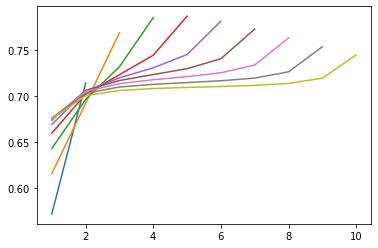

In [86]:
### Graphing Optimal Escape Probabilitys:
for n in range (3,12):
    Best_Policy, Best_Value = Find_Optimal_Policy(num_lily_pads = n)
    Steps = np.arange(1,n)
    plt.plot(Steps,Best_Value)

# Problem 4:

Yeah, so I read the problem and wow, imma just read that again and try an take some stuff away from it.... ALright, so we have infinite states and actions meaning the values that s or a can take are  $-\infty \to \infty$. If you take action a you then transition to the next state s' (which again, is any realy number) with a probability of the normal distribution that has a fixed varience. The normal distribution is centered around the state that you are starting in so it's likely that you will just kinda stay around your starting state for a while. Anyways, each time we transition we have a cost of $e^{as'}$ which we want to minimize. It is important to note that the action a does not effect what s' we transition to and only effects the cost

Let's solve this logically first before we do it mathematically. Given that we want to minimize $e^{as'}$ we know that the smallest value that we can get is when $as' \to -\infty$. We also know that a doesn't effect the s' and only s effects s'. This means that we can link a and s' to s.

Okay, some math: (Normal Distribution)

\begin{equation}
\mathcal{P}(s'|s) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}\left( \frac{s' -s}{\sigma}\right)^2}
\end{equation}

I expect that this approach is going to be similar to how I approached problem 2. Since $\gamma$ is 0 in this senario it makes sense that we can calculate the expected value of the cost for a state. we can do this by multiplying all of the probabilites for each of the potential states with there associated costs and summing them up. However the state space is continuous so it makes sense to just integrate over it. 

Let the cost function be:

\begin{equation}
C(a,s') = e^{as'}
\end{equation}

We then have that the expected cost function for any s should be:

\begin{equation}
\langle C(a,s') \rangle = \int_{s' = -\infty}^{s' = \infty}\mathcal{P}(s'|s) C(a,s')
\end{equation}

Once we have the expected cost function we can take the derivative of it with respect to the action and then we can solve for action as a function of s.

**Multivariate log normal in appendix of the book or use wikipedia**